In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize_scalar, minimize

In [2]:
os.chdir("C:\\Users\\sridhar\\Desktop\\DS2\\ML course kaggle\\4 Linear regrression")

In [3]:
data=pd.read_csv('weights_heights.csv')

1. Look at the first 5 rows using head method of Pandas DataFrame.                                             
Plot the histogram of weight distribution using method plot Pandas DataFrame. Make the color of histogram to be green and add title.

In [4]:
data.tail()

,Index,Height,Weight
24995,24996,69.50215,118.0312
24996,24997,64.54826,120.1932
24997,24998,64.69855,118.2655
24998,24999,67.52918,132.2682
24999,25000,68.87761,124.8740


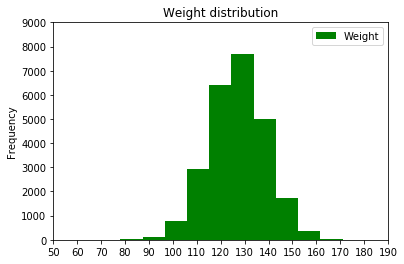

In [5]:
X=list(range(50,200,10))
Y=list(range(0,10000,1000))
data.plot(y='Weight', kind='hist', color='green', title='Weight distribution', xticks=X, yticks=Y)

 2.Create the picture that contains pairwise dependencies of features 'Height', 'Weight' and 'BMI'.

In [6]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / (height_inch / METER_TO_INCH) ** 2

In [7]:
data['BMI']=make_bmi(data['Height'], data['Weight'])

In [8]:
data.head()

,Index,Height,Weight,BMI
0,1,65.78331,112.9925,18.357573
1,2,71.51521,136.4873,18.762577
2,3,69.39874,153.0269,22.338895
3,4,68.21660,142.3354,21.504526
4,5,67.78781,144.2971,22.077581


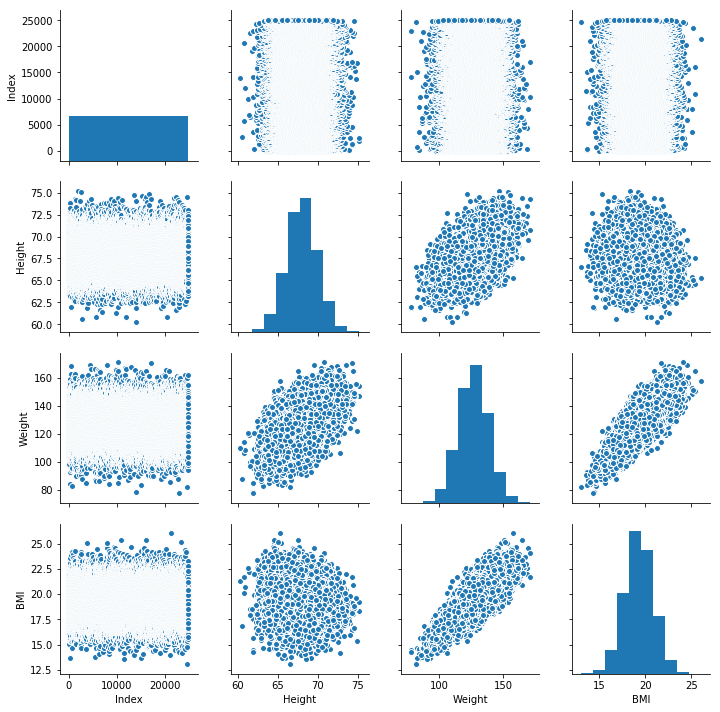

In [9]:
sns.pairplot(data=data)

3.  Create new feature weight_category in DataFrame data that will have 3 values: 1 if the weight is less than 120 pounds, 3 if the weight is greater or equal to 150 pounds, 2 in other cases. Create boxplot showing dependency between height and weight category. Use boxplot method of Seaborn library and apply method of Pandas DataFrame. Add titles "Height" to y axis and "Weight category" to x axis.

In [10]:
def weight_category(weight):
    if weight<120:
        weight=1
    elif weight>=150:
        weight=3
    else:
        weight=2
    return weight

In [11]:
data['weight_categ']=data['Weight'].apply(weight_category)

In [12]:
data.head()

,Index,Height,Weight,BMI,weight_categ
0,1,65.78331,112.9925,18.357573,1
1,2,71.51521,136.4873,18.762577,2
2,3,69.39874,153.0269,22.338895,3
3,4,68.21660,142.3354,21.504526,2
4,5,67.78781,144.2971,22.077581,2


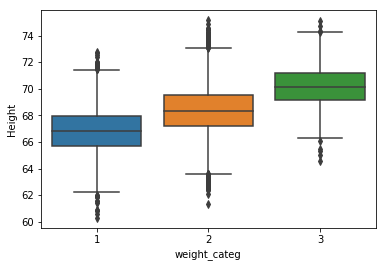

In [13]:
sns.boxplot(y='Height', x='weight_categ', data=data)

4.  Create scatter plot of dependencies between height and weight using plot method for Pandas DataFrame with option kind='scatter'. Add title to the figure.

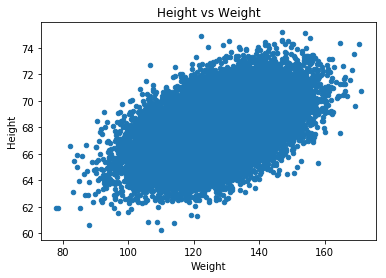

In [14]:
data.plot(y='Height', x='Weight', kind='scatter', title='Height vs Weight')

 5.  Create function computing squared error of dependency approximation between height y and weight x using straight line y=w0+w1∗x by two parameters w0 and w1:                                                     
                     error(w0,w1)=∑i=1n(yi−(w0+w1∗xi))2                                   
 Where n is number of observations in dataset, yi and xi are height and weight of ith person in dataset

In [15]:
def error(w0,w1,x,y_actual):
    y_pred = w0+w1*x
    mse = ((y_actual-y_pred)**2).mean()
    return mse

In [16]:
Error=error(60,0.05,data['Weight'],data['Height'])

6.  On plot from [4] Problem draw two straight lines corresponding to values of parameters w0,w1)=(60,0.05) and (w0,w1)=(50,0.16). Use plot method from matplotlib.pyplot and linspace method from NumPy library. Add the titles to axes and plot.

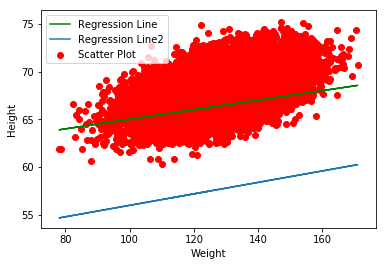

In [17]:
x = data['Weight']
y = 60 +0.05 * data['Weight']
y2=50+ 0.06*data['Weight']

# Ploting Line
plt.plot(x, y, color='green', label='Regression Line')
plt.plot(x, y2, label='Regression Line2')

# Ploting Scatter Points
plt.scatter(data['Weight'], data['Height'], c='red', label='Scatter Plot')

plt.xlabel('Weight')
plt.ylabel('Height')
plt.legend()
plt.show()


7.  Plot dependency between error function calculated  and w1 parameter when w0 = 50. Add the titles to axes and plot.

In [18]:
W1=(data['Height']-50)/data['Weight']

In [19]:
def Error11():
    Error1=[error(50,e,data['Weight'],data['Height']) for e in W1]
    return Error1

In [20]:
M=Error11()

In [21]:
M=np.array([round(l,1) for l in M])

Text(0.5,1,'Error vs w1')

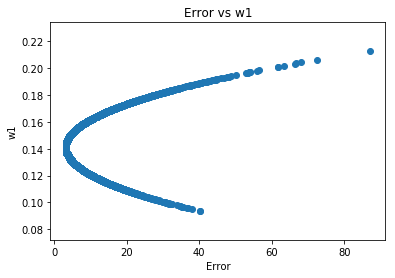

In [22]:
plt.scatter(M, W1)
plt.xlabel('Error')
plt.ylabel('w1')
plt.title('Error vs w1')

Now we can find the slope of the straight line approximating dependency between height and weight when coefficient is fixed w0=50 using optimization method.

[8]. Using minimize_scalar method from scipy.optimize find the minimum of the function[6] for parameter value w1
in range [-5,5]. Draw on plot [5] Problem 1 the straight line corresponding to the values of parameters (w0, w1) = (50, w1_opt) where w1_opt is optimal value of parameter w1 that was found in [8].

In [23]:
error(50,0.1,data['Weight'],data['Height'])

30.678869387204372

In [24]:
minimize_scalar(lambda w1: error(50,w1,data['Weight'],data['Height']),bounds=(-5,5))

     fun: 3.1804886914797943
    nfev: 9
     nit: 5
 success: True
       x: 0.14109203728834385

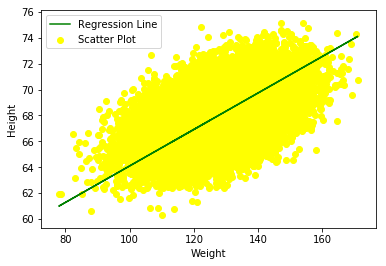

In [25]:
x1 = data['Weight']
y1 = 50 +0.141 * data['Weight']


# Ploting Line
plt.plot(x1, y1, color='green', label='Regression Line')


# Ploting Scatter Points
plt.scatter(data['Weight'], data['Height'], c='yellow', label='Scatter Plot')

plt.xlabel('Weight')
plt.ylabel('Height')
plt.legend()
plt.show()
